<div style="text-align: center; background-color: #750E21; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 20px; font-size: 40px; font-weight: bold; border-radius: 0 0 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2);">
  PROJECT: ... 📌
</div>

<div style="text-align: center; background-color: #0766AD; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 20px; font-size: 40px; font-weight: bold; border-radius: 0 0 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2);">
  Stage 1 - PRE-PROCESSING 📌
</div>

## **IMPORT LIBRARY** 🎄

In [327]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from scipy.stats import zscore
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler

## **GENERAL INFORMATION ABOUT THE DATA** 📝

<div style="text-align: left; font-family: 'Trebuchet MS', Arial, sans-serif; color: #8C3333; padding: 20px; font-size: 25px; font-weight: bold; border-radius: 0 0 0 0; background-color: #AFC8AD">
  1. Read data 🔥
</div>

In [328]:
df = pd.read_csv('../../Data/2425_QC.csv')
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35.0,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,27/3/2016 0:53,0
1,80.23,31.0,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,4/4/2016 1:39,0
2,69.47,26.0,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,13/3/2016 20:35,0
3,74.15,29.0,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,10/1/2016 2:31,0
4,68.37,35.0,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,3/6/2016 3:36,0


<div style="text-align: left; font-family: 'Trebuchet MS', Arial, sans-serif; color: #8C3333; padding: 20px; font-size: 25px; font-weight: bold; border-radius: 0 0 0 0; background-color: #AFC8AD">
  2. Comment on statistic of dataframe 🔥
</div>

In [329]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1002 entries, 0 to 1001
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1002 non-null   float64
 1   Age                       1001 non-null   float64
 2   Area Income               1002 non-null   float64
 3   Daily Internet Usage      1002 non-null   float64
 4   Ad Topic Line             1002 non-null   object 
 5   City                      1002 non-null   object 
 6   Male                      1002 non-null   int64  
 7   Country                   1002 non-null   object 
 8   Timestamp                 1002 non-null   object 
 9   Clicked on Ad             1002 non-null   int64  
dtypes: float64(4), int64(2), object(4)
memory usage: 78.4+ KB


📈`COMMENT:`
- Data Overview: The DataFrame has 1002 entries. There are 10 columns in total, with a mix of data types: float64, int64, and object. 
- dtypes: float64(4), int64(2), object(4)
- All columns, except `Age`, contain 1002 non-null values, meaning there’s only 1 missing value for the `Age` column.

📝`INSIGHT:`
- The dataset is almost complete with only a single missing value in the `Age` column, so missing data handling won't be a major issue.
- The combination of online activity, demographic information, and customer interaction (clicked or not clicked) creates a strong foundation for building models to predict ad clicks based on customer behavior.
- Columns like `City`, `Country`, and `Ad Topic Line` will likely require preprocessing, such as encoding, to make them suitable for analysis or modeling.

**1. Numerical Features:**
- Daily Time Spent on Site
- Age
- Area Income
- Daily Internet Usage

**2. Categorical Features:**
- Ad Topic Line
- City
- Country
- Timestamp
- Male (binary categorical feature)

**3. Target:**
- Clicked on Ad (binary classification target)

<div style="text-align: left; font-family: 'Trebuchet MS', Arial, sans-serif; color: #8C3333; padding: 20px; font-size: 25px; font-weight: bold; border-radius: 0 0 0 0; background-color: #AFC8AD">
  3. What does each column mean?? 🧮
</div>

<table style="width: 100%; border-collapse: collapse;font-family: 'Trebuchet MS', Arial, sans-serif;">
  <thead>
    <tr>
      <th style="min-width: 10px; width: 30px; background-color: #4E70BB; color: white; font-size :20px; font-weight: bold; text-align: left; padding: 8px;">No</th>
      <th style="background-color: #4E70BB; color: white; font-size :20px; font-weight: bold; text-align: left; padding: 8px;">Column Name</th>
      <th style="background-color: #4E70BB; color: white; font-size :20px; font-weight: bold; text-align: left; padding: 8px;">Meaning</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td style="font-weight: bold; font-size: 17px; color: #FFAA33; text-align: left;">1</td>
      <td style="font-weight: bold; font-size: 17px; color: #FFAA33; text-align: left;">Daily Time Spent on Site</td>
      <td style="font-size: 17px; text-align: left;">Customer time on site in minutes.</td>
    </tr>
    <tr>
      <td style="font-weight: bold; font-size: 17px; color: #FF0077; text-align: left;">2</td>
      <td style="font-weight: bold; font-size: 17px; color: #FF0077; text-align: left;">Age</td>
      <td style="font-size: 17px; text-align: left;">Customer age in years.</td>
    </tr>
    <tr>
      <td style="font-weight: bold; font-size: 17px; color: #009A80; text-align: left;">3</td>
      <td style="font-weight: bold; font-size: 17px; color: #009A80; text-align: left;">Area Income</td>
      <td style="font-size: 17px; text-align: left;">Average income of geographical area of customer.</td>
    </tr>
    <tr>
      <td style="font-weight: bold; font-size: 17px; color: #7DCE13; text-align: left;">4</td>
      <td style="font-weight: bold; font-size: 17px; color: #7DCE13; text-align: left;">Daily Internet Usage</td>
      <td style="font-size: 17px; text-align: left;">Average minutes a day customer is on the internet.</td>
    </tr>
    <tr>
      <td style="font-weight: bold; font-size: 17px; color: #EAE509; text-align: left;">5</td>
      <td style="font-weight: bold; font-size: 17px; color: #EAE509; text-align: left;">Ad Topic Line</td>
      <td style="font-size: 17px; text-align: left;">Headline of the advertisement.</td>
    </tr>
    <tr>
      <td style="font-weight: bold; font-size: 17px; color: #3081D0; text-align: left;">6</td>
      <td style="font-weight: bold; font-size: 17px; color: #3081D0; text-align: left;">City</td>
      <td style="font-size: 17px; text-align: left;">City of customer.</td>
    </tr>
    <tr>
      <td style="font-weight: bold; font-size: 17px; color: #FFAA33; text-align: left;">7</td>
      <td style="font-weight: bold; font-size: 17px; color: #FFAA33; text-align: left;">Male</td>
      <td style="font-size: 17px; text-align: left;">Whether or not customer was male.</td>
    </tr>
    <tr>
      <td style="font-weight: bold; font-size: 17px; color: #FF0077; text-align: left;">8</td>
      <td style="font-weight: bold; font-size: 17px; color: #FF0077; text-align: left;">Country</td>
      <td style="font-size: 17px; text-align: left;">Country of customer.</td>
    </tr>
    <tr>
      <td style="font-weight: bold; font-size: 17px; color: #00A9FF; text-align: left;">9</td>
      <td style="font-weight: bold; font-size: 17px; color: #00A9FF; text-align: left;">Timestamp</td>
      <td style="font-size: 17px; text-align: left;">Time at which customer clicked on Ad or closed window.</td>
    </tr>
    <tr>
      <td style="font-weight: bold; font-size: 17px; color: #7DCE13; text-align: left;">10</td>
      <td style="font-weight: bold; font-size: 17px; color: #7DCE13; text-align: left;">Clicked on Ad</td>
      <td style="font-size: 17px; text-align: left;">0 or 1 indicated clicking on Ad.</td>
    </tr>
  </tbody>
</table>

## **PROCESS PHASE** 📝

<div style="text-align: left; font-family: 'Trebuchet MS', Arial, sans-serif; color: #8C3333; padding: 20px; font-size: 25px; font-weight: bold; border-radius: 0 0 0 0; background-color: #AFC8AD">
  1. How many rows and how many columns does the data have? 🧮
</div>

In [330]:
shape = df.shape
print(f"Current shape: {shape}")

Current shape: (1002, 10)


<div style="text-align: left; font-family: 'Trebuchet MS', Arial, sans-serif; color: #8C3333; padding: 20px; font-size: 25px; font-weight: bold; border-radius: 0 0 0 0; background-color: #AFC8AD">
  2. What does each line mean? Does it matter if the lines have different meanings? 🧮
</div>

🔍🔍🔍 Understand the meaning of each line gives us a more overall understanding of the data.\
🔍🔍🔍 What our data is talking about or if some lines of data have different meanings, it will lead to the unconsistency of data and giving wrong insights.

📈`COMMENT:`
- Each row represents data about an individual's interaction with an online advertisement.
- This dataset would typically be used to analyze and predict user behavior, particularly what factors influence a customer's likelihood to click on an ad. Insights drawn from this kind of data help companies refine their ad strategies, target the right audiences, and optimize their marketing budget.

<div style="text-align: left; font-family: 'Trebuchet MS', Arial, sans-serif; color: #E7B10A; padding: 15px; font-size: 18px; font-weight: bold; border-radius: 0 0 0 0">
🧮🧮🧮  In our data, each line contains data about an individual's interaction with an online advertisement.
</div>

<div style="text-align: left; font-family: 'Trebuchet MS', Arial, sans-serif; color: #8C3333; padding: 20px; font-size: 25px; font-weight: bold; border-radius: 0 0 0 0; background-color: #AFC8AD">
  3. Is there duplicate data? 🧮
</div>

🚨  We need to check for the duplicated rows since duplicated rows don't have much meaning, even affect the overall insight of data.\
🚨  Therefore, each line should differ from each others.\
🚨  Having duplicated rows could lead to wrong insights for questions required counting.\
🚨  In this part, we will delve into check for duplicated rows. If duplicated rows exist, then drop it.

In [331]:
# Count duplicate rows
num_duplicates = df.duplicated(keep='first').sum()
print(f'Number of duplicated rows: {num_duplicates}')

# Drop duplicates
df = df.drop_duplicates(keep='first')
df = df.reset_index(drop=True)
num_duplicates = df.duplicated(keep='first').sum()
print(f'Number of duplicated rows after dropping: {num_duplicates}')

print(f"Current shape: {df.shape}")

Number of duplicated rows: 2
Number of duplicated rows after dropping: 0
Current shape: (1000, 10)


📈`COMMENT:`
- As you can see, there are only 2 rows being duplicated. After dropping that 2 rows, our data is ready for the further steps.

<div style="text-align: left; font-family: 'Trebuchet MS', Arial, sans-serif; color: #8C3333; padding: 20px; font-size: 25px; font-weight: bold; border-radius: 0 0 0 0; background-color: #AFC8AD">
  4. Is there outlier data? 🧮
</div>

🚨  Outliers are values that significantly deviate from other observations in the dataset.\
🚨  Outliers can skew results and lead to misleading conclusions if not handled properly.\
🚨  Identifying outliers is important to maintain data quality and improve the accuracy of the analysis.\
🚨  In this part, we will check for any outliers and determine whether to keep, transform, or remove them depending on their impact.

In [332]:
# describe the numerical features
df.describe()[['Daily Time Spent on Site','Age','Area Income','Daily Internet Usage']]

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage
count,1000.000000,999.000000,1000.000000,1000.000000
mean,65.000200,36.019019,55000.000080,180.000100
std,15.853615,8.784245,13414.634022,43.902339
min,32.600000,19.000000,13996.500000,104.780000
25%,51.360000,29.000000,47031.802500,138.830000
50%,68.215000,35.000000,57012.300000,183.130000
75%,78.547500,42.000000,65470.635000,218.792500
max,91.430000,61.000000,79484.800000,269.960000


📈`COMMENT:`
- Notice that the **Area Income** column is likely to have outliers. For example, the min **Area Income** is approximately 13996 while its mean is 55000. The mean is sensitive to outliers, but the fact the mean is so big compared to the min value indicates the min value is an outlier.

Now, we will visualize the values to check for outliers.

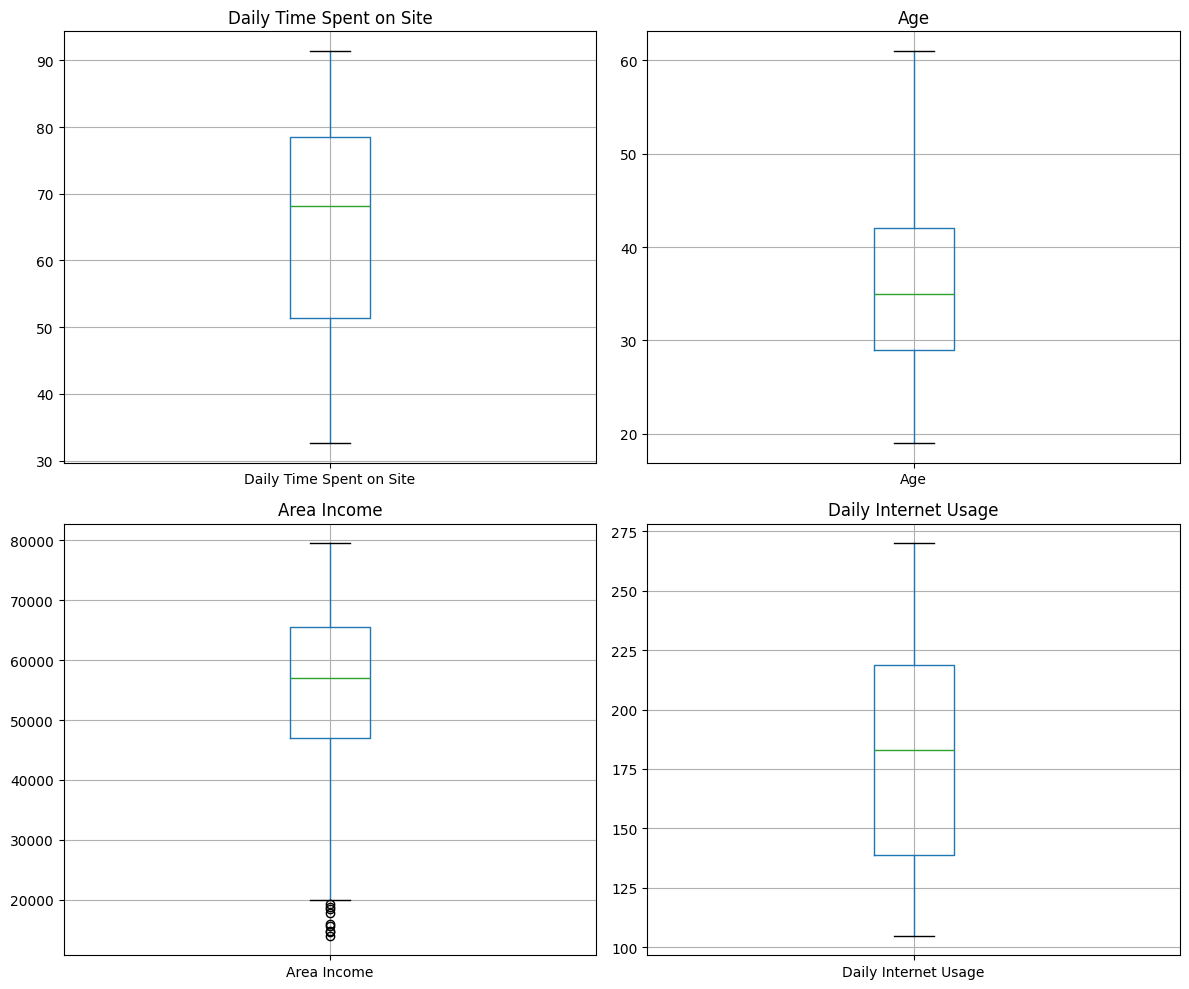

In [333]:
# Create a figure with 2 rows and 2 columns for the subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Plot boxplot for 'Daily Time Spent on Site'
pd.DataFrame(df['Daily Time Spent on Site']).boxplot(ax=axes[0, 0])
axes[0, 0].set_title("Daily Time Spent on Site")

# Plot boxplot for 'Age'
pd.DataFrame(df['Age']).boxplot(ax=axes[0, 1])
axes[0, 1].set_title("Age")

# Plot boxplot for 'Area Income'
pd.DataFrame(df['Area Income']).boxplot(ax=axes[1, 0])
axes[1, 0].set_title("Area Income")

# Plot boxplot for 'Daily Internet Usage'
pd.DataFrame(df['Daily Internet Usage']).boxplot(ax=axes[1, 1])
axes[1, 1].set_title("Daily Internet Usage")

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()

📝 **Using IQR**

Using the statistical method called interquartile range **(IQR)**, the outlier data points are the ones falling below **(Q1 – 1.5 \* IQR)** or above **(Q3 + 1.5 \* IQR)**.

The Q1 is the **25th percentile** and Q3 is the **75th percentile** of the dataset, and **IQR** represents the interquartile range calculated by Q3 minus Q1 (Q3 – Q1). 

Using the convenient pandas **.quantile()** function, we can create a simple Python function that takes in our column from the dataframe and outputs the outliers.

In [334]:
def findOutlierUsingIQR(df:pd.DataFrame):
    q1=df.quantile(0.25)
    q3=df.quantile(0.75)
    IQR=q3-q1
    lowerLimit=q1-1.5*IQR
    upperLimit=q3+1.5*IQR
    
    outliers = df[(df<lowerLimit) | (df>upperLimit)]

    return outliers

In [335]:
outliers = findOutlierUsingIQR(df[['Daily Time Spent on Site','Age','Area Income','Daily Internet Usage']])

outliers=outliers[~outliers.isnull().all(axis=1)]
print(outliers)

     Daily Time Spent on Site  Age  Area Income  Daily Internet Usage
135                       NaN  NaN     17709.98                   NaN
410                       NaN  NaN     19345.36                   NaN
510                       NaN  NaN     18819.34                   NaN
640                       NaN  NaN     15598.29                   NaN
665                       NaN  NaN     15879.10                   NaN
692                       NaN  NaN     14548.06                   NaN
768                       NaN  NaN     13996.50                   NaN
778                       NaN  NaN     14775.50                   NaN
952                       NaN  NaN     18368.57                   NaN


📈`COMMENT:`
- As predicted above, we detect 9 outliers in the **Area Income** column by using IQR method.

In [336]:
idx=outliers[~outliers.isnull().all(axis=1)].index
df.iloc[idx]

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
135,49.89,39.0,17709.98,160.03,Enhanced system-worthy application,East Michele,1,Belize,16/4/2016 12:09,1
410,48.09,33.0,19345.36,180.42,Balanced motivating help-desk,West Travismouth,0,Heard Island and McDonald Islands,28/5/2016 12:38,1
510,57.86,30.0,18819.34,166.86,Horizontal modular success,Estesfurt,0,Algeria,8/7/2016 17:14,1
640,64.63,45.0,15598.29,158.80,Triple-buffered high-level Internet solution,Isaacborough,1,Azerbaijan,12/6/2016 3:11,1
665,58.05,32.0,15879.10,195.54,Total asynchronous architecture,Sanderstown,1,Tajikistan,12/2/2016 10:39,1
692,66.26,47.0,14548.06,179.04,Optional full-range projection,Matthewtown,1,Lebanon,25/4/2016 19:31,1
768,68.58,41.0,13996.50,171.54,Exclusive discrete firmware,New Williamville,1,El Salvador,6/7/2016 12:04,1
778,52.67,44.0,14775.50,191.26,Persevering 5thgeneration knowledge user,New Hollyberg,0,Jersey,19/5/2016 6:37,1
952,62.79,36.0,18368.57,231.87,Total coherent archive,New James,1,Luxembourg,30/5/2016 20:08,1


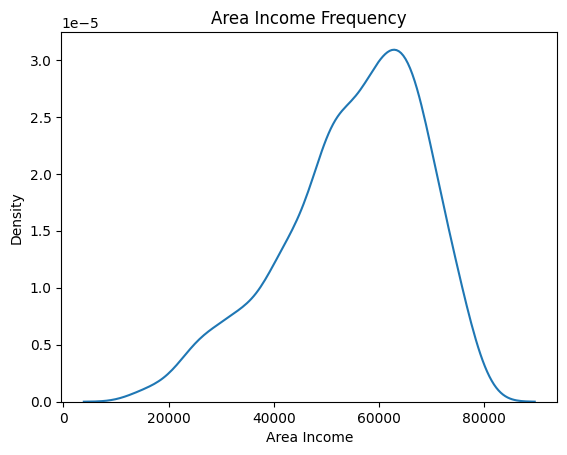

In [337]:
sns.kdeplot(data = df["Area Income"])
plt.title("Area Income Frequency")
plt.show()

📈`COMMENT:`
- The outliers represent **Area Income** and those are reasonable income, remove those would not be optional, so we will replace the outliers by capping them. 
- For the upper limit, we will use the mean plus three standard deviations. For the lower limit, we will calculate it as the mean minus 3 standard deviations, as the **Area Income** follows the normal distribution.

In [338]:
df_IQR = df.copy()

#B1: Tìm khoảng Limit

# Cach 1:Dùng IQR
q1=df_IQR['Area Income'].quantile(0.25)
q3=df_IQR['Area Income'].quantile(0.75)
lower_limit = q1 - 1.5*(q3 - q1)
upper_limit = q3 + 1.5*(q3 - q1)
print(upper_limit)
print(lower_limit)

# Cach 2:Dùng mean()-3*std() và mean()+3*std()
# upper_limit = df['Area Income'].mean() + 3*df['Area Income'].std()
# print(upper_limit)
# lower_limit = df['Area Income'].mean() - 3*df['Area Income'].std()
# print(lower_limit)


# B2: Thay Outliers

# Cach 1: Thay giá trị outliers
df_IQR['Area Income'] = np.where(
    df_IQR['Area Income'] > upper_limit,
    upper_limit,
    np.where(df_IQR['Area Income'] < lower_limit, 
        lower_limit,
        df_IQR['Area Income'])
)

# Cach 2: Xóa outliers
#dfCopy=dfCopy.iloc[~idx]


#B3: Kiểm tra lại
df_IQR.describe()[['Daily Time Spent on Site','Age','Area Income','Daily Internet Usage']]


93128.88375
19373.553750000003


,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage
count,1000.000000,999.000000,1000.000000,1000.000000
mean,65.000200,36.019019,55025.321364,180.000100
std,15.853615,8.784245,13343.228619,43.902339
min,32.600000,19.000000,19373.553750,104.780000
25%,51.360000,29.000000,47031.802500,138.830000
50%,68.215000,35.000000,57012.300000,183.130000
75%,78.547500,42.000000,65470.635000,218.792500
max,91.430000,61.000000,79484.800000,269.960000


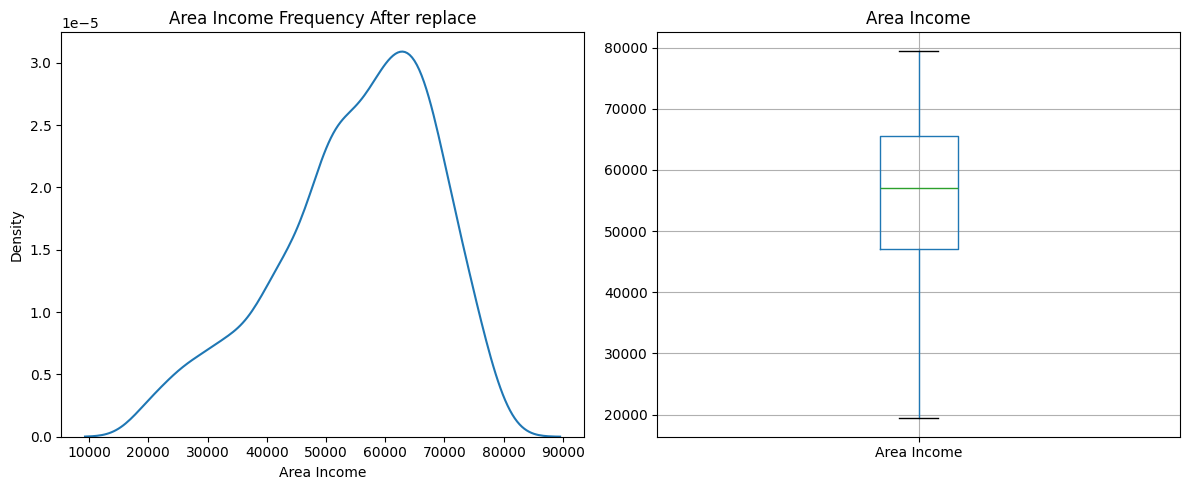

In [339]:
# Create subplots: 1 row, 2 columns
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# KDE plot on the first subplot
sns.kdeplot(data=df_IQR["Area Income"], ax=ax[0])
ax[0].set_title("Area Income Frequency After replace")

# Boxplot on the second subplot
pd.DataFrame(df_IQR['Area Income']).boxplot(ax=ax[1])
ax[1].set_title("Area Income")

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

📈`Conclusion:`
- The distribution did not get affected after replacing. Also, as the outlier values were replaced by the max and min limit, notice, how in the PDF or KDEplot, there are more values near 20000.

📝 **Using Z-Score**

The Z-score is a statistical method used to determine how far a data point deviates from the mean of a dataset. It measures how many standard deviations a data point is from the mean.

A typical threshold for outliers using Z-scores is 3 (or -3). Any data point with a Z-score greater than 3 or less than -3 is considered an outlier.

We'll use zscore function from scipy to calculate the Z-score for a dataset

In [340]:
def detect_outlier_z_score(df:pd.DataFrame, threshold):
    z_scores_abs = abs(zscore(df))
    test = pd.DataFrame(z_scores_abs, columns=df.columns)
    outlier_index = (test > threshold).any(axis=1)
    return outlier_index


In [341]:
invalid_index = detect_outlier_z_score(df[['Daily Time Spent on Site','Age','Area Income','Daily Internet Usage']], 3)
df[invalid_index]

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
692,66.26,47.0,14548.06,179.04,Optional full-range projection,Matthewtown,1,Lebanon,25/4/2016 19:31,1
768,68.58,41.0,13996.50,171.54,Exclusive discrete firmware,New Williamville,1,El Salvador,6/7/2016 12:04,1
778,52.67,44.0,14775.50,191.26,Persevering 5thgeneration knowledge user,New Hollyberg,0,Jersey,19/5/2016 6:37,1


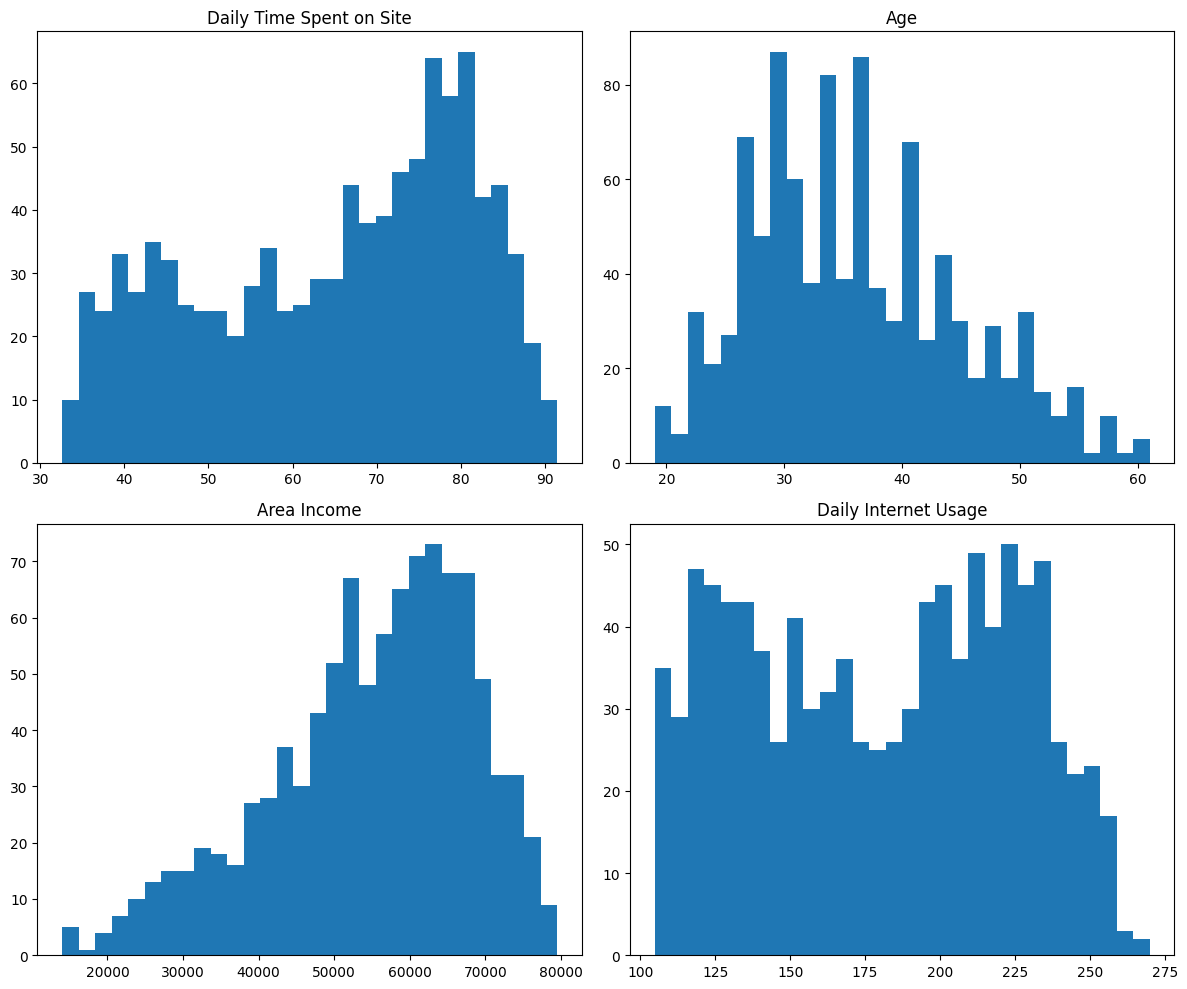

In [342]:
# Create subplots: 2 rows, 2 columns
fig, ax = plt.subplots(2, 2, figsize=(12, 10))

# Histogram for 'Daily Time Spent on Site' on the first subplot
ax[0, 0].hist(df['Daily Time Spent on Site'], bins=30)
ax[0, 0].set_title("Daily Time Spent on Site")

# Histogram for 'Age' on the second subplot
ax[0, 1].hist(df['Age'], bins=30)
ax[0, 1].set_title("Age")

# Histogram for 'Area Income' on the third subplot
ax[1, 0].hist(df['Area Income'], bins=30)
ax[1, 0].set_title("Area Income")

# Histogram for 'Daily Internet Usage' on the fourth subplot
ax[1, 1].hist(df['Daily Internet Usage'], bins=30)
ax[1, 1].set_title("Daily Internet Usage")

# Adjust layout to prevent overlap and display the plots
plt.tight_layout()
plt.show()

📈`COMMENT:`

...

In [343]:
df_Zscore = df.copy()

lower_limit = df_Zscore['Area Income'].quantile(0.01)
upper_limit = df_Zscore['Area Income'].quantile(0.99)

df_Zscore['Area Income'] = df_Zscore['Area Income'].clip(lower=lower_limit, upper=upper_limit)
df_Zscore.describe()[['Daily Time Spent on Site','Age','Area Income','Daily Internet Usage']]

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage
count,1000.000000,999.000000,1000.000000,1000.000000
mean,65.000200,36.019019,55026.621844,180.000100
std,15.853615,8.784245,13295.345900,43.902339
min,32.600000,19.000000,20586.977300,104.780000
25%,51.360000,29.000000,47031.802500,138.830000
50%,68.215000,35.000000,57012.300000,183.130000
75%,78.547500,42.000000,65470.635000,218.792500
max,91.430000,61.000000,77144.378100,269.960000


In [344]:
df = df_IQR.copy()
df.count()

Daily Time Spent on Site    1000
Age                          999
Area Income                 1000
Daily Internet Usage        1000
Ad Topic Line               1000
City                        1000
Male                        1000
Country                     1000
Timestamp                   1000
Clicked on Ad               1000
dtype: int64

<div style="text-align: left; font-family: 'Trebuchet MS', Arial, sans-serif; color: #8C3333; padding: 20px; font-size: 25px; font-weight: bold; border-radius: 0 0 0 0; background-color: #AFC8AD">
  5. Is there missing data? 🧮
</div>

🚨  Missing data can distort the results of our analysis and lead to inaccurate insights.\
🚨  It is crucial to identify and handle missing values effectively.\
🚨  If missing data exists, we will explore strategies to fill or remove them based on the context and nature of the dataset.\
🚨  In this section, we will analyze for any missing values and take necessary actions such as filling, imputation, or removal.

👀  As mention above, there is only 1 column in 1 row with missing data, let take a look again.

In [345]:
df.isnull().sum().sort_values(ascending=False)

Age                         1
Daily Time Spent on Site    0
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               0
City                        0
Male                        0
Country                     0
Timestamp                   0
Clicked on Ad               0
dtype: int64

❄️ Let remove the row with missing age value, since removing only 1 row won't significantly affect the analysis.

In [346]:
df = df.dropna(subset=['Age'])
print(f"Current shape: {df.shape}")

Current shape: (999, 10)


📈`COMMENT:`
- ...

<div style="text-align: left; font-family: 'Trebuchet MS', Arial, sans-serif; color: #8C3333; padding: 20px; font-size: 25px; font-weight: bold; border-radius: 0 0 0 0; background-color: #AFC8AD">
  6. Is there any imbalance in "Clicked on AD" labels?
</div>

🔍🔍🔍
- Imbalance occurs when certain classes in a dataset are underrepresented compared to others, leading to a skewed distribution of class labels.
-  Imbalance is often encountered in binary classification problems, where one class (e.g., positive cases) may significantly outnumber the other class (e.g., negative cases).

👀 Count unique values in the 'Clicked on Ad' column.

In [347]:
value_counts = df['Clicked on Ad'].value_counts()
print(f'Value Counts: {value_counts}')

Value Counts: Clicked on Ad
0    500
1    499
Name: count, dtype: int64


👀 Visualize the distribution

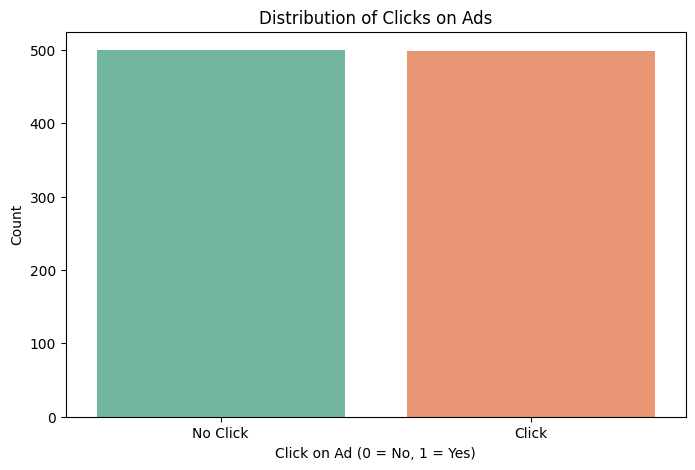

In [348]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Clicked on Ad', hue='Clicked on Ad', data=df, palette='Set2', legend=False)
plt.title('Distribution of Clicks on Ads')
plt.xlabel('Click on Ad (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.xticks([0, 1], ['No Click', 'Click'])
plt.show()

👀 Calculate proportions

In [349]:
proportions = value_counts / len(df)
print("\nProportions of Each Class:")
print(proportions)


Proportions of Each Class:
Clicked on Ad
0    0.500501
1    0.499499
Name: count, dtype: float64


📈`COMMENT:`
- This ***close-to-even split*** indicates that there is ***no significant class imbalance*** present in the dataset. 
- Such a balanced distribution is advantageous for classification tasks, as it helps ensure that the predictive model can learn effectively from both classes without bias towards one over the other. 
- As a result, we can expect more reliable and equitable model performance when predicting user engagement with ads.

<div style="text-align: left; font-family: 'Trebuchet MS', Arial, sans-serif; color: #8C3333; padding-left: 20px; padding-bottom:10px;padding-top:10px;font-size: 25px; font-weight: bold; border-radius: 0 0 0 0; background-color: #AFC8AD">
  6.  What data type does each column currently have? 🧮
</div>
<div style="text-align: left; font-family: 'Trebuchet MS', Arial, sans-serif; color: #8C3333; padding-left: 20px; padding-bottom:20px; font-size: 25px; font-weight: bold; border-radius: 0 0 0 0; background-color: #AFC8AD">
      Are there any columns whose data types are not suitable for further processing? 🧮
</div>

👀 Next we will take a look at the data type of each column and classify column data.

In [350]:
df.dtypes

Daily Time Spent on Site    float64
Age                         float64
Area Income                 float64
Daily Internet Usage        float64
Ad Topic Line                object
City                         object
Male                          int64
Country                      object
Timestamp                    object
Clicked on Ad                 int64
dtype: object

👀 We can clearly see that the data type of `Age` column is **float64** so we will convert it into **int64**.

In [351]:
df['Age'] = df['Age'].astype('int64')

👀`Timestamp` are problaly date-time data type. We convert this column into **date-time**.

In [352]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'], format='mixed')

👀 Now let's take a look again the data types of each column.

In [353]:
df.dtypes

Daily Time Spent on Site           float64
Age                                  int64
Area Income                        float64
Daily Internet Usage               float64
Ad Topic Line                       object
City                                object
Male                                 int64
Country                             object
Timestamp                   datetime64[ns]
Clicked on Ad                        int64
dtype: object



🔍 Looking at an overview of the data set, we do not need to standardlize any data columns, but we may need to normalize some numeric data columns.

Now, let check the distribution and summary statistics of the numerical features to determine the best normalization method.

📋 `Summary statistics`

In [354]:
# Get only the numerical features
numerical_columns = ['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage']

# Get the statistics of the numerical features
df[numerical_columns].describe()


,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage
count,999.000000,999.000000,999.000000,999.000000
mean,65.020210,36.019019,55050.496060,180.001752
std,15.848916,8.784245,13326.130277,43.924298
min,32.600000,19.000000,19373.553750,104.780000
25%,51.440000,29.000000,47095.115000,138.790000
50%,68.250000,35.000000,57014.840000,183.420000
75%,78.555000,42.000000,65479.350000,218.795000
max,91.430000,61.000000,79484.800000,269.960000


📊 `Visualize distribution`

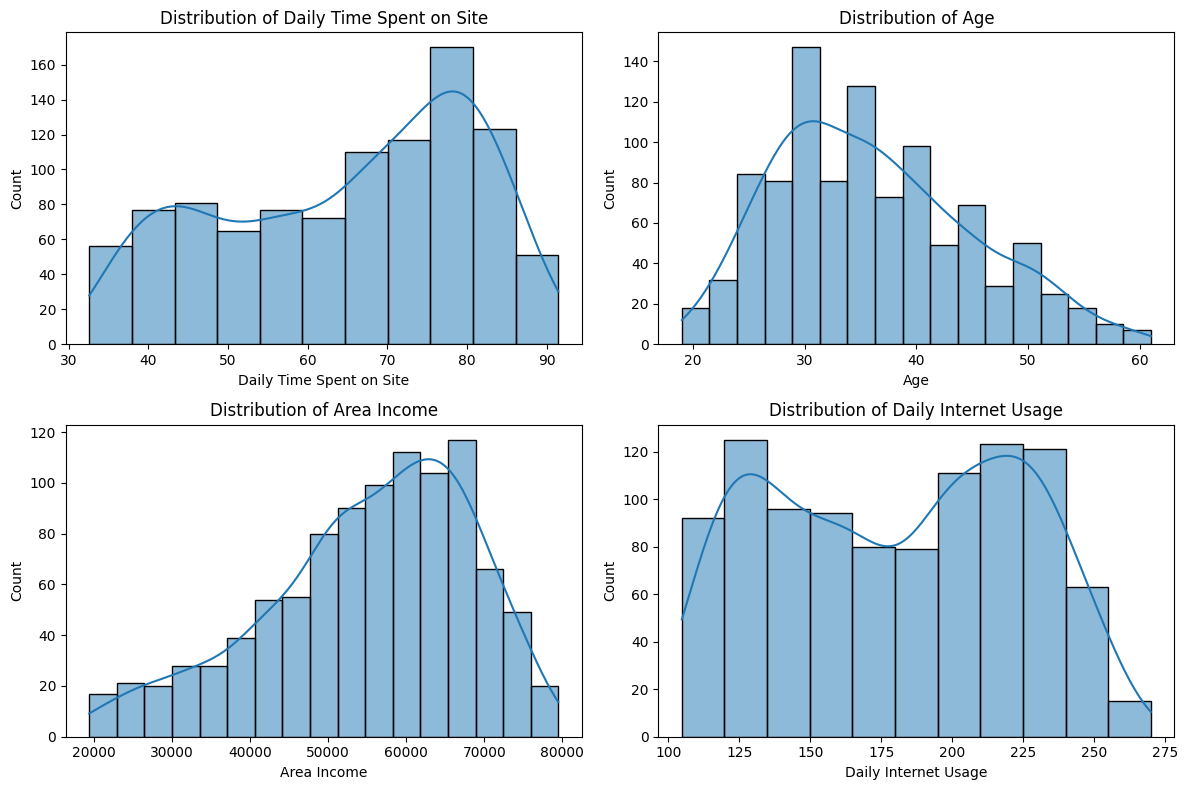

In [355]:
# Create subplots - 2 rows, 2 columns for 4 features
fig, axes = plt.subplots(2, 2, figsize=(12, 8))  # Adjusting the figure size and grid layout

# Flatten axes for easy iteration
axes = axes.flatten()

# Plot each numerical feature in a separate subplot
for i, col in enumerate(numerical_columns):
    sns.histplot(df[col], kde=True, ax=axes[i])  # Plot histogram and KDE in the i-th subplot
    axes[i].set_title(f'Distribution of {col}')  # Set title for each subplot

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the combined plot
plt.show()


📏 `Calculate skewness`

In [356]:
skewness = df[numerical_columns].skew()
skewness

Daily Time Spent on Site   -0.374245
Age                         0.477895
Area Income                -0.622931
Daily Internet Usage       -0.033634
dtype: float64

📈`COMMENT:`
- Based on the above analysis results, we can see that the values ​​of `Daily Time Spent on Site`, `Age`, `Area Income` tend to be unevenly distributed, a typical example is having a longer tail.

- Meanwhile, the prices for `Daily Internet Usage` are distributed quite evenly and are only concave in a small section in the middle of the chart. 

- In addition, the skewness calculation results also show that `Daily Internet Usage` has the skewness value closest to 0, while `Daily Time Spent on Site`, `Age` and `Area Income` are far away from 0. 

📝Therefore, we can choose the Min-Max Scaling method for `Daily Time Spent on Site`, `Age` and `Area Income`. On the other hand, `Daily Internet Usage` will apply the Z-score Normalizaion method 

In [357]:
# copy the dataframe
df_scaled = df.copy()

# Apply MinMaxScaler to specific columns
min_max_columns = ['Daily Time Spent on Site', 'Age', 'Area Income']
scaler = MinMaxScaler()
df_scaled[min_max_columns] = scaler.fit_transform(df_scaled[min_max_columns])

# Apply StandardScaler to specific columns
z_score_columns = ['Daily Internet Usage']
scaler = StandardScaler()
df_scaled[z_score_columns] = scaler.fit_transform(df_scaled[z_score_columns])

df_scaled.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,0.617882,0.380952,0.706363,1.733126,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:00,0
1,0.809621,0.285714,0.816291,0.313611,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:00,0
2,0.626721,0.166667,0.672293,1.286908,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:00,0
3,0.706272,0.238095,0.589451,1.500792,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-10-01 02:31:00,0
4,0.608023,0.380952,0.906926,1.038174,Robust logistical utilization,South Manuel,0,Iceland,2016-03-06 03:36:00,0


<div style="text-align: left; font-family: 'Trebuchet MS', Arial, sans-serif; color: #8C3333; padding: 20px; font-size: 25px; font-weight: bold; border-radius: 0 0 0 0; background-color: #AFC8AD">
  7. For each column with numeric data type, how are the values distributed ? 🧮
</div> 

In [358]:
df.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Timestamp,Clicked on Ad
count,999.000000,999.000000,999.000000,999.000000,999.000000,999,999.000000
mean,65.020210,36.019019,55050.496060,180.001752,0.481481,2016-05-11 20:02:18.798798848,0.499499
min,32.600000,19.000000,19373.553750,104.780000,0.000000,2016-01-01 02:52:00,0.000000
25%,51.440000,29.000000,47095.115000,138.790000,0.000000,2016-03-02 22:59:00,0.000000
50%,68.250000,35.000000,57014.840000,183.420000,0.000000,2016-04-30 08:07:00,0.000000
75%,78.555000,42.000000,65479.350000,218.795000,1.000000,2016-07-01 16:37:00,1.000000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,2016-12-07 10:56:00,1.000000
std,15.848916,8.784245,13326.130277,43.924298,0.499907,NaN,0.500250
